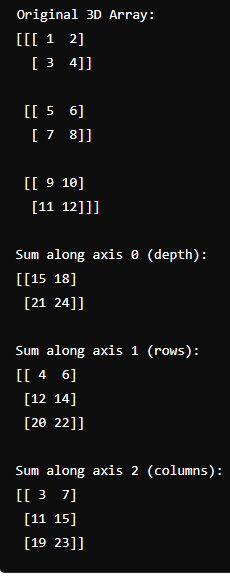

In [213]:
import numpy as np

myarray = np.array([
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ],
    [
        [7, 8],
        [9, 10],
        [11, 12]
    ]
])

(myarray.sum(axis=2))

array([[ 3,  7, 11],
       [15, 19, 23]])

In [214]:
import numpy as np

# data
X = np.array([
    [0, -6],
    [4, 4],
    [0, 0],
    [-5, 2]
])

# Initial Z
Z_init = np.array([
    [-5, 2],
    [0, -6]
])

k = 2

def argmin_l1_distance(x, Z):
    """Returns the index j for which x vector is the closest to Z[j]

    Args:
        x (np.array): shape (d,)
        Z (np.array): shape (k, d)
    """
    return np.argmin(np.abs(x - Z).sum(axis=1))

def kmeans_l1(X, Z, T=10):
    n, d = X.shape
    k = Z.shape[0]
    for t in range(T):
        # Put x vectors into the optimum clusters
        clusters = [[] for _ in range(k)]
        for x in X:
            min_idx = argmin_l1_distance(x, Z)
            clusters[min_idx].append(x)
        print(f"clusters at iteration {t+1} =", clusters)
        
        # Update Z with median vectors in clusters
        clusters_vectorized = np.array([np.array(clusters[j]) for j in range(k)])
        print("clusters_vectorized =\n", clusters_vectorized)
        print("  shape =", clusters_vectorized.shape)
        Z = np.median(clusters_vectorized, axis=1)
        print("Z =", Z)

kmeans_l1(X, Z_init)

clusters at iteration 1 = [[array([4, 4]), array([-5,  2])], [array([ 0, -6]), array([0, 0])]]
clusters_vectorized =
 [[[ 4  4]
  [-5  2]]

 [[ 0 -6]
  [ 0  0]]]
  shape = (2, 2, 2)
Z = [[-0.5  3. ]
 [ 0.  -3. ]]
clusters at iteration 2 = [[array([4, 4]), array([-5,  2])], [array([ 0, -6]), array([0, 0])]]
clusters_vectorized =
 [[[ 4  4]
  [-5  2]]

 [[ 0 -6]
  [ 0  0]]]
  shape = (2, 2, 2)
Z = [[-0.5  3. ]
 [ 0.  -3. ]]
clusters at iteration 3 = [[array([4, 4]), array([-5,  2])], [array([ 0, -6]), array([0, 0])]]
clusters_vectorized =
 [[[ 4  4]
  [-5  2]]

 [[ 0 -6]
  [ 0  0]]]
  shape = (2, 2, 2)
Z = [[-0.5  3. ]
 [ 0.  -3. ]]
clusters at iteration 4 = [[array([4, 4]), array([-5,  2])], [array([ 0, -6]), array([0, 0])]]
clusters_vectorized =
 [[[ 4  4]
  [-5  2]]

 [[ 0 -6]
  [ 0  0]]]
  shape = (2, 2, 2)
Z = [[-0.5  3. ]
 [ 0.  -3. ]]
clusters at iteration 5 = [[array([4, 4]), array([-5,  2])], [array([ 0, -6]), array([0, 0])]]
clusters_vectorized =
 [[[ 4  4]
  [-5  2]]

 [[ 0 -6

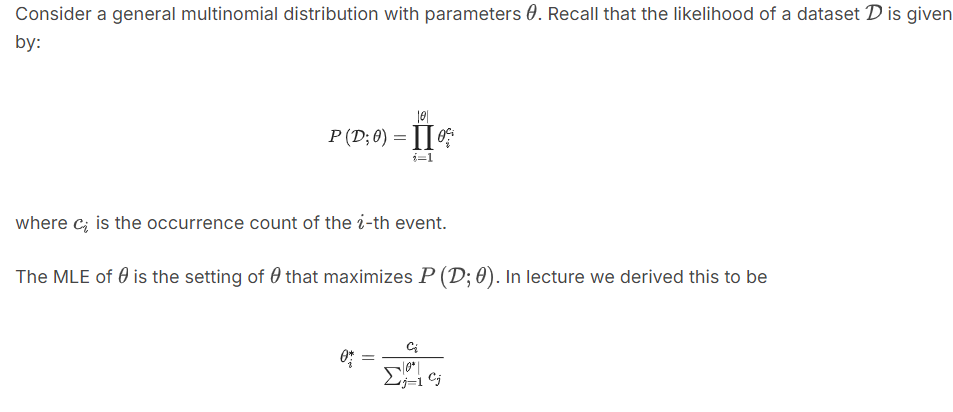

In [215]:
6*6*3

108

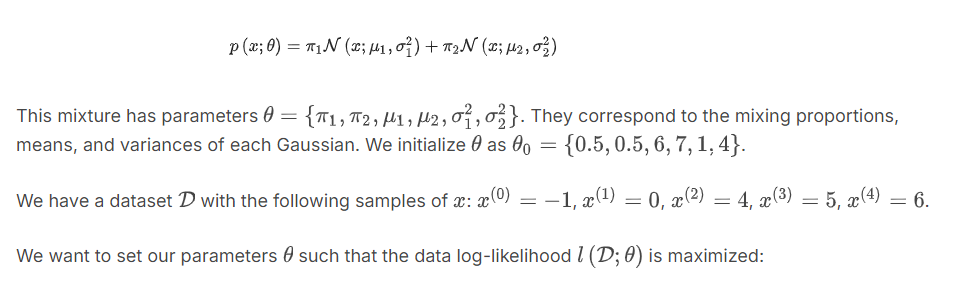

In [216]:
def likelihood(x, mu, sigma2):
    return 1/np.sqrt(2*np.pi*sigma2) * np.exp(-0.5 * (x-mu)**2 / sigma2)

def mixed_log_likelihood(X, Pi, Mu, Sigma2):
    n = len(X)
    log_mixed_sum = 0
    for i in range(n):
        log_mixed_sum += np.log(np.dot(Pi, likelihood(X[i], Mu, Sigma2)))
    
    return log_mixed_sum

def posterior_y(x, Pi, Mu, Sigma2):
    return likelihood(x, Mu, Sigma2) * Pi / np.dot(Pi, likelihood(x, Mu, Sigma2))

X = np.array([-1, 0, 4, 5, 6])  # data

Pi = np.array([0.5, 0.5])
Mu = np.array([6, 7])
Sigma2 = np.array([1, 4])

def posterior_y_all_x(X, Pi, Mu, Sigma2):
    return np.array([posterior_y(X[i], Pi, Mu, Sigma2) for i in range(X.shape[0])])

def Mu_posterior(X, Pi, Mu, Sigma2):
    return np.dot(X, posterior_y_all_x(X, Pi, Mu, Sigma2)) / posterior_y_all_x(X, Pi, Mu, Sigma2).sum(axis=0)

def Sigma2_posterior(X, Pi, Mu, Sigma2):
    # Mu = Mu_posterior(X, Pi, Mu, Sigma2)
    return (posterior_y_all_x(X, Pi, Mu, Sigma2) * (X.reshape((X.shape[0], 1)) - Mu)**2).sum(axis=0) / posterior_y_all_x(X, Pi, Mu, Sigma2).sum(axis=0)

myposterior = posterior_y_all_x(X, Pi, Mu, Sigma2)
mymu = Mu_posterior(X, Pi, Mu, Sigma2)
mysigma2 = Sigma2_posterior(X, Pi, Mu, Sigma2)
print("myposterior =\n", myposterior)
print("mymu =", mymu)
print("X - mymu =\n", X.reshape((5, 1)) - mymu)
print("mysigma2 =\n", mysigma2)

myposterior =
 [[1.36512049e-07 9.99999863e-01]
 [1.39244156e-05 9.99986076e-01]
 [4.54661673e-01 5.45338327e-01]
 [6.66666667e-01 3.33333333e-01]
 [6.93842896e-01 3.06157104e-01]]
mymu = [5.13172803 1.47103149]
X - mymu =
 [[-6.13172803 -2.47103149]
 [-5.13172803 -1.47103149]
 [-1.13172803  2.52896851]
 [-0.13172803  3.52896851]
 [ 0.86827197  4.52896851]]
mysigma2 =
 [0.63780375 5.09310884]


In [ ]:
def EM(X, Pi, Mu, Sigma2, T=100):
    for t in T:
        posteriors = posterior_y_all_x(X, Pi, Mu, Sigma2)
        Mu = Mu_posterior(X, Pi, Mu, Sigma2)
        Sigma2 = Sigma2_posterior(X, Pi, Mu, Sigma2)

In [217]:
X - 5.131

array([-6.131, -5.131, -1.131, -0.131,  0.869])

In [218]:
for x in X:
    idx = (1 if posterior_y(0, x, Pi, Mu, Sigma2) > posterior_y(1, x, Pi, Mu, Sigma2) else 2)
    print(f"{x} belongs to dist {idx}")

TypeError: posterior_y() takes 4 positional arguments but 5 were given

In [ ]:
Mu = np.array([0, 0])
Sigma2 = np.array([1, 1])

likelihood(0, Mu, Sigma2)

array([0.39894228, 0.39894228])